In [1]:
!pip3 install wfdb

     |████████████████████████████████| 113 kB 921 kB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 9.3 MB/s eta 0:00:01
  Created wheel for wfdb: filename=wfdb-3.1.1-py3-none-any.whl size=117828 sha256=6f1d6d322ede793aa80974bd47db882804e5e9dd91c5efdd9546cb5fc35b9a9a
  Stored in directory: /Users/jisu/Library/Caches/pip/wheels/d3/07/95/3bae5f5d0de47aa2d5f8a2a31230ee89593badc75b9e0242dc
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=c1fee53fafc05470b32722488bdf3c548c4050c51b3393bbd312a96480a93f65
  Stored in directory: /Users/jisu/Library/Caches/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built wfdb sklearn
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [1]:
import wfdb

In [2]:
record = wfdb.rdrecord('data/27') 

In [3]:
record

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

In [4]:
record = wfdb.rdrecord('data/200')

sig_name : 뒤에 확장자처럼 생긴 것  
dat : signal이 없는 헤더 파일

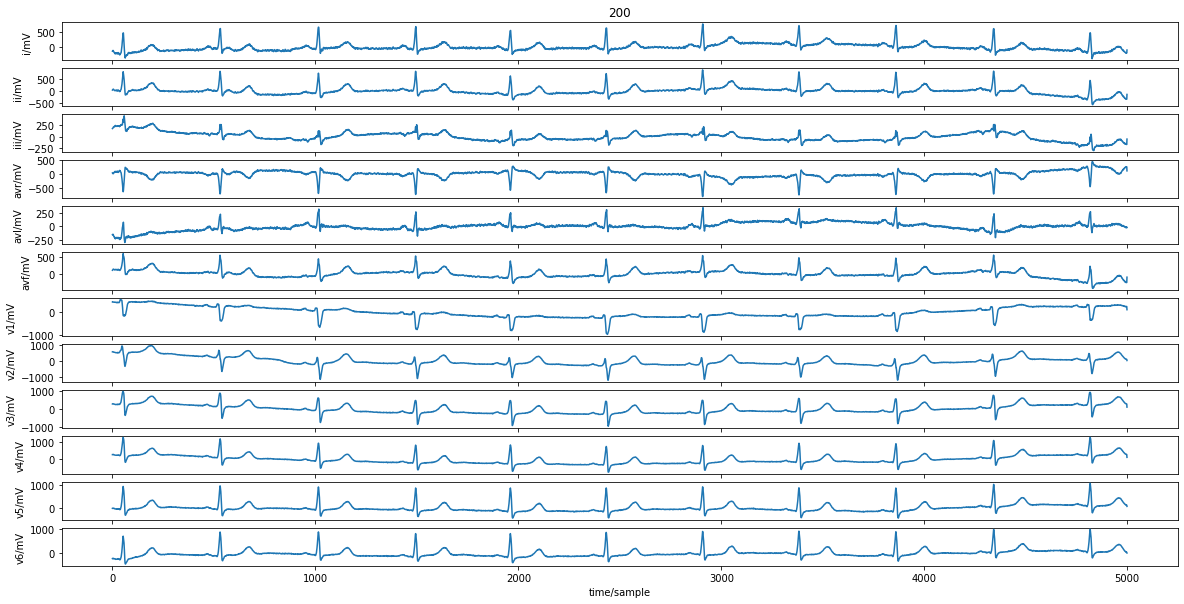

{'record_name': '200',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 56',
  '<sex>: F',
  '<diagnoses>:',
  'Electric axis of the heart: normal.',
  'Left ventricular hypertrophy.',
  'Non-specific repolarization abnormalities: anterior wall.'],
 'sig_name': ['i',
  'ii',
  'iii',
  'avr',
  'avl',
  'avf',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6'],
 'p_signal': array([[-131.9945616 ,   40.00930131,  171.99749437, ...,  270.00093614,
          -22.00553933, -220.00599048],
        [-125.007725  ,   49.99452864,  175.00019681, ...,  267.0113273 ,
          -24.9933604 , -226.9948859 ],
        [-125.007725  ,   55.00993963,  180.00470086, ...,  275.01381562,
          -19.98994574, -220.00599048],
        ...,
        [-182.99675207, -350.00729514, -167.0042364 , ...,  279.99649702,
          120.01081307,   50.00942946],
        [-190.00075533, -351.99066222, -161.99973234, .

In [5]:
wfdb.plot_wfdb(record=record, title='200',figsize=(20,10),plot_sym=True) 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
#record2 = wfdb.rdrecord('26', pn_dir='ex/')

In [5]:
len(record.p_signal)
# P,QRS 가 정상 범위내에 있는지. : 
# QRS이냐 detection
# 이완, X
# P, QRS, T

5000

In [6]:
data = []
for i in range(1,201):
    record = wfdb.rdrecord('data/%s'%i)
    data.append(record.__dict__)

In [7]:
columns = []
for key in data[0].keys():
    columns.append(key)

In [8]:
import pandas as pd
type(data[0])
df = pd.DataFrame(columns=columns)

In [9]:
columns

['record_name',
 'n_sig',
 'fs',
 'counter_freq',
 'base_counter',
 'sig_len',
 'base_time',
 'base_date',
 'comments',
 'sig_name',
 'p_signal',
 'd_signal',
 'e_p_signal',
 'e_d_signal',
 'file_name',
 'fmt',
 'samps_per_frame',
 'skew',
 'byte_offset',
 'adc_gain',
 'baseline',
 'units',
 'adc_res',
 'adc_zero',
 'init_value',
 'checksum',
 'block_size']

In [43]:
data[26]['p_signal'][0]

array([ 126.99489242,    7.00141646, -120.00095743,  -67.0017119 ,
        123.99486368,  -56.00145156,  -44.99671732, -167.00281286,
       -196.9902981 , -409.98620389,    0.        ,  -65.00406635])

In [44]:
data[26]['p_signal'][1]

array([  85.00187482,   -7.00141646,  -91.99622441,  -39.00181752,
         88.0031915 ,  -49.00127011,  -50.00443999, -175.00110553,
       -209.99117024, -412.01275166,  -11.98768095,  -72.00509445])

In [10]:
for i in range(len(data)):
    df=df.append({'record_name' : data[i]['record_name'],
                    'n_sig':data[i]['n_sig'],
                    'fs': data[i]['fs'],             
                    'counter_freq':data[i]['counter_freq'],
                    'base_counter': data[i]['base_counter'],
                  'sig_len': data[i]['sig_len'],
                    'base_time': data[i]['base_time'],
                     'base_date': data[i]['base_date'],
                 'comments': data[i]['comments'],
                 'sig_name': data[i]['sig_name'],
                  'p_signal': data[i]['p_signal'],
                 'd_signal': data[i]['d_signal'],
                 'e_p_signal': data[i]['e_p_signal'],
                 'e_d_signal': data[i]['e_d_signal'],
                 'file_name': data[i]['file_name'],
                 'fmt': data[i]['fmt'],
                 'samps_per_frame': data[i]['samps_per_frame'],
                 'skew': data[i]['skew'],
                 'byte_offset': data[i]['byte_offset'],
                  'adc_gain': data[i]['adc_gain'],
                 'baseline': data[i]['baseline'],
                 'units': data[i]['units'],
                 'adc_res': data[i]['adc_res'],
                 'adc_zero': data[i]['adc_zero'],
                 'init_value': data[i]['init_value'],
                 'checksum': data[i]['checksum'],
                 'block_size': data[i]['block_size']},ignore_index=True)

In [11]:
index = []
pa = []
for i in range(len(df)):
    if df.comments[i][3] == 'Electric axis of the heart: normal.':
        #print(df.comments[i][3])
        index.append(i)
    try:
        df.comments[i][4]
    except:
        print("")
    else:
        if df.comments[i][4] == 'Electric axis of the heart: normal.':
            index.append(i)
        #elif df.comments[i][4] == 'Electric axis of the heart: normal.':
            

In [13]:
len(index)

75

In [10]:
index = [118,
122,
134,
141,
148,
151,
156,
160,
161,
165,
186,
192,
194,
197,
198]

In [25]:
df['status'] = 0

In [27]:
df['status'].iloc[index] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
df.to_csv('data.csv', index=False)

In [12]:
df2 = df2.reset_index()

In [14]:
df3 = df.drop(index)

In [15]:
df3 = df3.reset_index()

In [16]:
df2.to_csv('normal.csv', index=False)
df3.to_csv('abnormal.csv', index=False)

In [17]:
# https://github.com/MIT-LCP/wfdb-python/blob/master/demo.ipynb

In [23]:
for i in range(len(df2)):
    print(df2.comments[i])

['<age>: 26', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 18', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 26', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 43', '<sex>: F', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 25', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 30', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 28', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 19', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 30', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 20', '<sex>: M', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 22', '<sex>: F', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 42', '<sex>: F', '<diagnoses>:', 'Electric axis of the heart: normal.']
['<age>: 28', '<sex>: F', '<